In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# Loading and transposing the dataset

df = pd.read_csv("Train_call.csv")
df = df.T
x = df.iloc[4:,:]

# Loading the labels
labels = pd.read_csv("Train_clinical.csv")
y = labels.iloc[1:,1]

In [3]:
## Implementing random search to hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Below takes forever to run. Do not run it if not necessary

In [4]:
## First Nested CV process

# Outer CV
cv_outer = KFold(n_splits=5, shuffle=True, random_state=2)

# Dataframe for the inner CV results

cols = {"n_estimators":[],"min_samples_split":[],"min_samples_leaf":[],"max_features":[],"max_depth":[],"bootstrap":[]}
best_parameters = pd.DataFrame(data=cols)

for i in range(10):
    print("In progress...{}/10".format(i+1))

    for train_ix, test_ix in cv_outer.split(x):
        # Train and test split in the inner cross-validation set
        x_in_train, x_in_test = x.iloc[train_ix, :], x.iloc[test_ix, :]
        y_in_train, y_in_test = y.iloc[train_ix], y.iloc[test_ix]

        # Configure the inner cross-validation procedure
        cv_inner = KFold(n_splits=4, shuffle=True, random_state=i)

        # Define the model
        model = RandomForestClassifier(random_state=i)

        # Define search space
        search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 50, cv = cv_inner, random_state=i, n_jobs = -1)
        result = search.fit(x_in_train, y_in_train)
        best_model = result.best_estimator_

        # Evaluate model on the hold out dataset
        yhat = best_model.predict(x_in_test)

        # Evaluate the model
        acc = accuracy_score(y_in_test, yhat)

        # Store the result
        print("   Inner loop running...")
        best_parameters = best_parameters.append(result.best_params_,ignore_index = True)
    if i == 9:
        print("Done")

In progress...1/10
   Inner loop running...
   Inner loop running...
   Inner loop running...
   Inner loop running...
   Inner loop running...
In progress...2/10
   Inner loop running...
   Inner loop running...
   Inner loop running...
   Inner loop running...
   Inner loop running...
In progress...3/10
   Inner loop running...
   Inner loop running...
   Inner loop running...
   Inner loop running...
   Inner loop running...
In progress...4/10
   Inner loop running...
   Inner loop running...
   Inner loop running...
   Inner loop running...
   Inner loop running...
In progress...5/10
   Inner loop running...
   Inner loop running...
   Inner loop running...
   Inner loop running...
   Inner loop running...
In progress...6/10
   Inner loop running...
   Inner loop running...
   Inner loop running...
   Inner loop running...
   Inner loop running...
In progress...7/10
   Inner loop running...
   Inner loop running...
   Inner loop running...
   Inner loop running...
   Inner loop run

In [5]:
best_parameters

,n_estimators,min_samples_split,min_samples_leaf,max_features,max_depth,bootstrap
0,1800.0,5.0,4.0,None,30.0,1.0
1,1200.0,2.0,1.0,None,90.0,1.0
2,400.0,10.0,1.0,None,40.0,1.0
3,200.0,5.0,2.0,None,20.0,0.0
4,1200.0,5.0,2.0,None,NaN,1.0
5,400.0,5.0,4.0,None,100.0,1.0
6,400.0,2.0,2.0,None,60.0,1.0
7,200.0,5.0,1.0,None,110.0,1.0
8,200.0,5.0,1.0,None,110.0,1.0
9,200.0,2.0,1.0,None,10.0,1.0


In [6]:
best_parameters.to_csv("RandomSearch_Best_Parameters_rawdata.csv")

In [7]:
# See the frequency of best hyperparameter in Random Search
for col in best_parameters.columns:
    print(best_parameters[col].value_counts(),"\n")

1200.0    11
800.0      9
400.0      8
200.0      7
1800.0     5
600.0      4
1400.0     2
2000.0     2
1000.0     1
1600.0     1
Name: n_estimators, dtype: int64 

2.0     19
5.0     17
10.0    14
Name: min_samples_split, dtype: int64 

1.0    24
2.0    15
4.0    11
Name: min_samples_leaf, dtype: int64 

Series([], Name: max_features, dtype: int64) 

20.0     10
40.0      6
90.0      5
60.0      5
110.0     5
10.0      5
100.0     4
30.0      2
80.0      2
Name: max_depth, dtype: int64 

1.0    47
0.0     3
Name: bootstrap, dtype: int64 



In [13]:
from sklearn.model_selection import GridSearchCV
## Grid Search

# Outer CV
cv_outer = KFold(n_splits=5, shuffle=True, random_state=42)

# enumerate splits
outer_results = list()

for train_ix, test_ix in cv_outer.split(x):
    # Train and test split in the inner cross-validation set
    x_in_train, x_in_test = x.iloc[train_ix, :], x.iloc[test_ix, :]
    y_in_train, y_in_test = y.iloc[train_ix], y.iloc[test_ix]

    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=4, shuffle=True, random_state=42)
    # define the model
    # min_samples_leaf, max_depth and bootstrap are fixed from the most frequent one
    model = RandomForestClassifier(min_samples_leaf = 1, max_depth = 20, bootstrap= True, random_state=42)
    
    # define search space based on the frequency above
    # total 6 combination possible
    space = dict()
    space['n_estimators'] = [400, 800, 1200]
    space['min_samples_split'] = [2, 5]
    # define search
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(x_in_train, y_in_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(x_in_test)
    # evaluate the model
    acc = accuracy_score(y_in_test, yhat)
    # store the result
    outer_results.append(acc)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))

# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))

>acc=0.850, est=0.688, cfg={'min_samples_split': 5, 'n_estimators': 400}
>acc=0.700, est=0.712, cfg={'min_samples_split': 5, 'n_estimators': 400}
>acc=0.700, est=0.738, cfg={'min_samples_split': 2, 'n_estimators': 400}
>acc=0.750, est=0.713, cfg={'min_samples_split': 2, 'n_estimators': 400}
>acc=0.750, est=0.713, cfg={'min_samples_split': 5, 'n_estimators': 400}
Accuracy: 0.750 (0.055)


In [14]:
# Final model with hand-picked hyperparameters from the 5 best models of outer CV
final_model = RandomForestClassifier(n_estimators = 400, min_samples_split = 5, min_samples_leaf = 1, max_depth = 20, bootstrap = True, random_state = 42)

In [15]:
# Last 5-fold cross-validation to have avearage validation performance
accuracies = list()
sds = list()
for i in range(50):
    final_cv = KFold(n_splits = 5, shuffle = True, random_state = i)
    temp_acc = []
    for train_ix, test_ix in final_cv.split(x):
        # Train and test split in the inner cross-validation set
        x_in_train, x_in_test = x.iloc[train_ix, :], x.iloc[test_ix, :]
        y_in_train, y_in_test = y.iloc[train_ix], y.iloc[test_ix]

        final_model.fit(x_in_train, y_in_train)
        # get the best performing model fit on the whole training set
        # evaluate model on the hold out dataset
        yhat = final_model.predict(x_in_test)
        # evaluate the model
        acc = accuracy_score(y_in_test, yhat)
        accuracies.append(acc)
        temp_acc.append(acc)
    sd = np.std(temp_acc)
    sds.append(sd)
    print("In progress...{}/50".format(i+1))

In progress...1/50
In progress...2/50
In progress...3/50
In progress...4/50
In progress...5/50
In progress...6/50
In progress...7/50
In progress...8/50
In progress...9/50
In progress...10/50
In progress...11/50
In progress...12/50
In progress...13/50
In progress...14/50
In progress...15/50
In progress...16/50
In progress...17/50
In progress...18/50
In progress...19/50
In progress...20/50
In progress...21/50
In progress...22/50
In progress...23/50
In progress...24/50
In progress...25/50
In progress...26/50
In progress...27/50
In progress...28/50
In progress...29/50
In progress...30/50
In progress...31/50
In progress...32/50
In progress...33/50
In progress...34/50
In progress...35/50
In progress...36/50
In progress...37/50
In progress...38/50
In progress...39/50
In progress...40/50
In progress...41/50
In progress...42/50
In progress...43/50
In progress...44/50
In progress...45/50
In progress...46/50
In progress...47/50
In progress...48/50
In progress...49/50
In progress...50/50


/home/gahacat/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

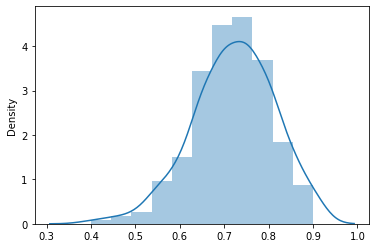

In [16]:
sn.distplot(accuracies)

/home/gahacat/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

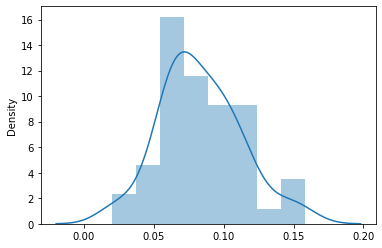

In [17]:
sn.distplot(sds)

In [18]:
np.mean(accuracies)

0.7212

In [19]:
np.mean(sds)

0.0831640815777523

In [20]:
# Final model on filtered data

df_filtered = pd.read_csv("Train_117.csv")
df_filtered = df_filtered.T
x_filtered = df_filtered.iloc[5:,:]

In [21]:
# Last 5-fold cross-validation to have avearage validation performance
accuracies_filtered = list()
sds_filtered = list()
for i in range(50):
    final_cv = KFold(n_splits = 5, shuffle = True, random_state = i)
    temp_acc_filtered = []
    for train_ix, test_ix in final_cv.split(x_filtered):
        # Train and test split in the inner cross-validation set
        x_in_train, x_in_test = x_filtered.iloc[train_ix, :], x_filtered.iloc[test_ix, :]
        y_in_train, y_in_test = y.iloc[train_ix], y.iloc[test_ix]

        final_model.fit(x_in_train, y_in_train)
        # get the best performing model fit on the whole training set
        # evaluate model on the hold out dataset
        yhat = final_model.predict(x_in_test)
        # evaluate the model
        acc = accuracy_score(y_in_test, yhat)
        accuracies_filtered.append(acc)
        temp_acc_filtered.append(acc)
    sd = np.std(temp_acc_filtered)
    sds_filtered.append(sd)
    print("In progress...{}/50".format(i+1))

In progress...1/50
In progress...2/50
In progress...3/50
In progress...4/50
In progress...5/50
In progress...6/50
In progress...7/50
In progress...8/50
In progress...9/50
In progress...10/50
In progress...11/50
In progress...12/50
In progress...13/50
In progress...14/50
In progress...15/50
In progress...16/50
In progress...17/50
In progress...18/50
In progress...19/50
In progress...20/50
In progress...21/50
In progress...22/50
In progress...23/50
In progress...24/50
In progress...25/50
In progress...26/50
In progress...27/50
In progress...28/50
In progress...29/50
In progress...30/50
In progress...31/50
In progress...32/50
In progress...33/50
In progress...34/50
In progress...35/50
In progress...36/50
In progress...37/50
In progress...38/50
In progress...39/50
In progress...40/50
In progress...41/50
In progress...42/50
In progress...43/50
In progress...44/50
In progress...45/50
In progress...46/50
In progress...47/50
In progress...48/50
In progress...49/50
In progress...50/50


/home/gahacat/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

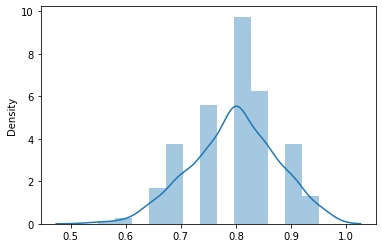

In [22]:
sn.distplot(accuracies_filtered)

/home/gahacat/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

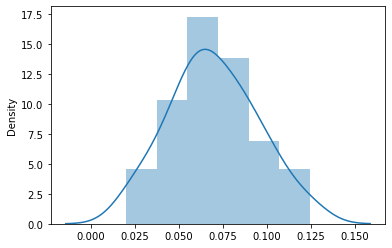

In [23]:
sn.distplot(sds_filtered)

In [24]:
print(np.mean(accuracies))
print(np.mean(accuracies_filtered))
print(np.mean(sds))
print(np.mean(sds_filtered))

0.7212
0.7965999999999999
0.0831640815777523
0.06950663550402832
